<a href="https://colab.research.google.com/github/illyesa/Bootcamp_GENAI_Fev2025/blob/main/DailyChallengeW4D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

Saving metadata.csv to metadata.csv


{'metadata.csv': b',image,class,format,mode,shape\r\n0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"\r\n1,Cancer (1).png,tumor,PNG,L,"(300, 240)"\r\n2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"\r\n3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"\r\n4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"\r\n5,Cancer (100).jpg,tumor,JPEG,RGB,"(512, 512, 3)"\r\n6,Cancer (1000).jpg,tumor,JPEG,RGB,"(290, 250, 3)"\r\n7,Cancer (1001).jpg,tumor,JPEG,RGB,"(620, 620, 3)"\r\n8,Cancer (1002).JPG,tumor,JPEG,RGB,"(338, 264, 3)"\r\n9,Cancer (1003).jpg,tumor,JPEG,RGB,"(442, 353, 3)"\r\n10,Cancer (1004).jpg,tumor,JPEG,RGB,"(353, 300, 3)"\r\n11,Cancer (1005).jpg,tumor,JPEG,RGB,"(251, 201, 3)"\r\n12,Cancer (1006).jpg,tumor,JPEG,RGB,"(431, 400, 3)"\r\n13,Cancer (1007).jpg,tumor,JPEG,RGB,"(212, 209, 3)"\r\n14,Cancer (1008).jpg,tumor,JPEG,RGB,"(234, 216, 3)"\r\n15,Cancer (1009).jpg,tumor,JPEG,RGB,"(223, 226, 3)"\r\n16,Cancer (101).jpg,tumor,JPEG,RGB,"(512, 512, 3)"\r\n17,Cancer (1010).jpg,tumor,JPEG,RGB,"(380, 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
data = pd.read_csv("metadata.csv")
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['class'])
num_train_images = train_data.shape[0]
num_val_images = val_data.shape[0]
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_val_images}")

Number of training images: 3680
Number of validation images: 920


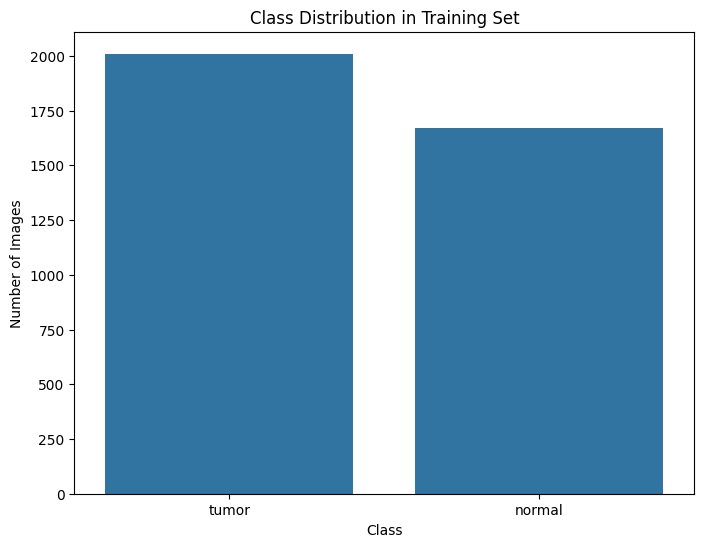

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='class')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [6]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'path_to_your_training_images'
val_dir = 'path_to_your_validation_images'

train_generator = train_datagen.flow_from_dataframe(
    train_data,
    directory=train_dir,
    x_col='image',
    y_col='class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = val_datagen.flow_from_dataframe(
    val_data,
    directory=val_dir,
    x_col='image',
    y_col='class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3680 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 920 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [7]:
def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

input_shape = (150, 150, 3)

cnn_model = create_cnn_model(input_shape)
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,645,441 (40.61 MB)

 Trainable params: 10,645,057 (40.61 MB)

 Non-trainable params: 384 (1.50 KB)

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


ValueError: The PyDataset has length 0

In [ ]:
# Plot training/validation accuracy vs. epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training/Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training/validation loss vs. epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training/Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
cnn_model.save('brain_tumor_cnn_model.h5')
